### Resumo

Esse notebook tem como objetivo compilar o volume de dados do problema usando um steamming.
Em teste para uma amostra de 500 palavras esse método reduziu para 228, as palavras foram conferidas e o processamento do texto condiz com o esperado da metodologia


In [1]:
FILE_PATH = 'NIPS_1987-2015.csv'

In [2]:
import pandas as pd
data_full = pd.read_csv(FILE_PATH)


In [3]:
import numpy as np
data_full= data_full.iloc[:, :] # :( 

data_full_2 = data_full.iloc[:,1:]
data_full_2 = data_full_2.set_index(np.array(data_full.iloc[:,0]))
data_full_2 = data_full_2.T

data_full_2.to_csv('data_transpose.csv')
data_full = data_full_2

In [4]:
data_full.head()

,abalone,abbeel,abbott,abbreviate,abbreviated,abc,abeles,abernethy,abilistic,abilities,...,zhou,zhu,zien,zilberstein,zones,zoo,zoom,zou,zoubin,zurich
1987_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987_2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1987_3,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1987_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987_5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Making a simple visualization

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

data_plot = pca.fit_transform(data_full.iloc[:,:])



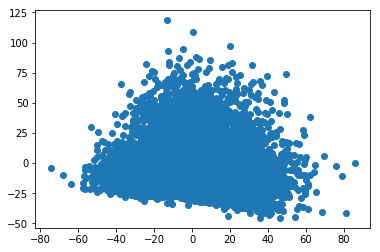

In [6]:
import matplotlib.pyplot as plt 

plt.scatter(data_plot[:,0], data_plot[:,1])
plt.show()

In [7]:
# Fazendo o steamming e conferindo a transformação do mesmo  
from nltk.stem.lancaster import LancasterStemmer 

lc = LancasterStemmer()

words = np.array(data_full.keys())

for i in range(len(words)):
    words[i] = lc.stem(str(words[i]))
    
print(len(words))
print(len(set(words)))

11463
5985


In [8]:
data_remake = pd.DataFrame()

# Em todas as palavras do DataFrame
for key in data_full.keys():
    
    key_stem = lc.stem(str(key))

    # Caso existe somente existirá uma soma 
    if key_stem in data_remake.keys():
        data_remake[key_stem] = data_remake[key_stem] + data_full[key]
        
    # Apenas inicializa caso não existe uma chave no DataFrame
    else:
        data_remake[key_stem] = 0
        data_remake[key_stem] = data_full[key]


In [9]:
print(data_remake.head())


        abalon  abbeel  abbot  abbrevy  abc  abel  abernethy  abl  abnorm  \
1987_1       0       0      0        0    0     0          0    2       0   
1987_2       0       0      0        0    0     0          0    1       0   
1987_3       0       0      0        0    0     0          0    2       0   
1987_4       0       0      0        0    0     0          0    0       0   
1987_5       0       0      0        0    0     0          0    1       0   

        abound   ...    zhou  zhu  zien  zilberstein  zon  zoo  zoom  zou  \
1987_1       0   ...       0    0     0            0    0    0     0    0   
1987_2       0   ...       0    0     0            0    0    0     0    0   
1987_3       0   ...       0    0     0            0    0    0     0    0   
1987_4       0   ...       0    0     0            0    0    0     0    0   
1987_5       0   ...       0    0     0            0    0    0     0    0   

        zoubin  zurich  
1987_1       0       0  
1987_2       0       0  

In [10]:
data_remake.describe()

,abalon,abbeel,abbot,abbrevy,abc,abel,abernethy,abl,abnorm,abound,...,zhou,zhu,zien,zilberstein,zon,zoo,zoom,zou,zoubin,zurich
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,...,5811.000000,5811.000000,5811.000000,5811.00000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,0.019102,0.025297,0.033557,0.021855,0.049905,0.015660,0.022371,0.593702,0.020134,0.009637,...,0.085183,0.120461,0.014972,0.01153,0.010669,0.008949,0.012907,0.025297,0.037859,0.020134
std,0.283475,0.382779,0.333049,0.167098,0.568164,0.262247,0.346383,1.093537,0.354136,0.097702,...,0.459520,0.558409,0.161585,0.21646,0.225461,0.137305,0.154135,0.240224,0.274464,0.215830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,21.000000,13.000000,3.000000,25.000000,13.000000,14.000000,13.000000,15.000000,1.000000,...,9.000000,15.000000,6.000000,9.00000,11.000000,6.000000,5.000000,9.000000,6.000000,7.000000


In [11]:
print(data_remake.shape)

(5811, 5985)


In [ ]:
data_remake.to_csv('data_remake.csv')